In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
df_ptj = pd.read_csv('ptj.csv')
df_egd = pd.read_csv('egydrill.csv')
df_pwr = pd.read_csv('power.csv')

In [5]:
df_ptj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    275 non-null    object 
 1   number of piles         275 non-null    int64  
 2   daily rate per machine  275 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ KB


In [6]:
df_egd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    61 non-null     object 
 1   number of piles         61 non-null     float64
 2   daily rate per machine  61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 6.6+ KB


In [7]:
df_pwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    34 non-null     object 
 1   number of piles         34 non-null     float64
 2   daily rate per machine  34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 6.6+ KB


In [11]:
#displaying the summary statistics for all companies
print (df_ptj.describe())
print (80*'-')
print (df_egd.describe())
print (80*'-')
print (df_pwr.describe())
print (80*'-')

       number of piles  daily rate per machine
count       275.000000              275.000000
mean          2.781818                0.927273
std           1.299788                0.433263
min           0.000000                0.000000
25%           2.000000                0.666667
50%           3.000000                1.000000
75%           4.000000                1.333333
max           6.000000                2.000000
--------------------------------------------------------------------------------
       number of piles  daily rate per machine
count        61.000000               61.000000
mean          3.180328                0.636066
std           1.231641                0.246328
min           0.000000                0.000000
25%           2.000000                0.400000
50%           3.000000                0.600000
75%           4.000000                0.800000
max           5.000000                1.000000
-------------------------------------------------------------------------

In [29]:
#generating confidence interval for all 3 companies

ptj_m,egd_m,pwr_m = [],[],[]

for i in range (10000):
    dfs = df_ptj.sample(200,replace=True)
    dfs_mean = dfs['daily rate per machine'].mean()
    ptj_m.append(dfs_mean)

for i in range (10000):
    dfs = df_egd.sample(200,replace=True)
    dfs_mean = dfs['daily rate per machine'].mean()
    egd_m.append(dfs_mean)
    
for i in range (10000):
    dfs = df_pwr.sample(200, replace=True)
    dfs_mean = dfs['daily rate per machine'].mean()
    pwr_m.append(dfs_mean)


In [69]:
df_mean = pd.DataFrame()
df_mean['petrojet'] = ptj_m
df_mean['egy drill'] = egd_m
df_mean['power'] = pwr_m
df_mean['average daily piles per machine'] = (df_mean['petrojet']*3+df_mean['egy drill']*5+df_mean['power']*2)/10

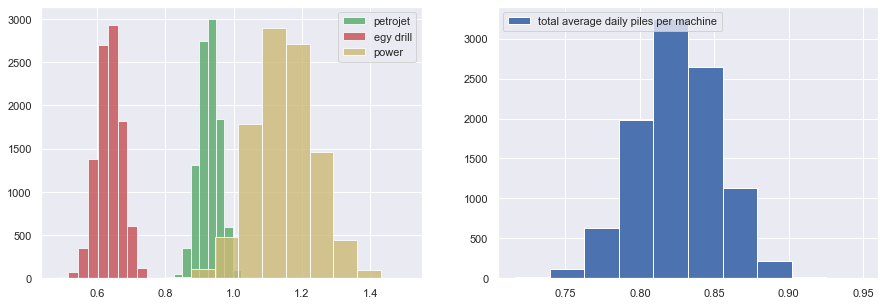

In [82]:
figure,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5));
#plt.figure(figsize=(10,5));
ax[0].hist(df_mean['petrojet'],alpha=0.8, color='g', label='petrojet');
ax[0].hist(df_mean['egy drill'],alpha=0.8, color='r', label='egy drill');
ax[0].hist(df_mean['power'],alpha=0.8, color='y', label='power');
ax[0].legend();

ax[1].hist(df_mean['average daily piles per machine'],label='total average daily piles per machine');
ax[1].legend(loc=2);

In [88]:
#based on 80% confidence interval
lower_limit  = np.percentile(df_mean['average daily piles per machine'],10)
higher_limit = np.percentile(df_mean['average daily piles per machine'],90)
piles_rem = 1639-589
days_remain_lower = piles_rem/(10*lower_limit)
days_remain_higher = piles_rem/(10*higher_limit)
print (days_remain_lower,days_remain_higher)

132.8739403213596 122.03872777805735


In [92]:
#number of piles done by every company at higher / lower limit

ptj_piles_low = days_remain_lower*3*df_mean['petrojet'].mean()
ptj_piles_high = days_remain_higher*3*df_mean['petrojet'].mean()

egd_piles_low = days_remain_lower*5*df_mean['egy drill'].mean()
egd_piles_high = days_remain_higher*5*df_mean['egy drill'].mean()

pwr_piles_low = days_remain_lower*2*df_mean['power'].mean()
pwr_piles_high = days_remain_higher*2*df_mean['power'].mean()

print ('petrojet portion')
print (ptj_piles_low,ptj_piles_high)
print (40*'-')
print ('egy drill portion')
print (egd_piles_low,egd_piles_high)
print (40*'-')
print ('power portion')
print (pwr_piles_low,pwr_piles_high)
print (40*'-')

petrojet portion
369.73044217284826 339.5807535658645
----------------------------------------
egy drill portion
422.28398940250344 387.8488189865162
----------------------------------------
power portion
304.8840750754499 280.02228692857136
----------------------------------------
